This notebook is used to see what structures activate which node in a trained nerual network.

In [1]:
import joblib
import sys
sys.path.insert(0,'/Users/walfits/Repositories/Aglaia/')
import energies_NN as nn
import numpy as np
from sklearn import model_selection as modsel

In [2]:
# Loading the data
data = joblib.load("cc_kjmol_invdist.bz")
X = data["X"]
y = np.reshape(data["y"], (data["y"].shape[0],))

In [3]:
data_2 = joblib.load("cartesian_and_descriptor.bz")
X_cartesian = data_2["X_cartesian"]
X_descriptor = data_2["X_id"]

In [4]:
# Splitting the data
X_train, X_test, y_train, y_test = modsel.train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)

(16558, 21)


In [5]:
# Training the model
estimator = nn.Energies_NN(max_iter=20000, learning_rate_init=0.03, hidden_layer_sizes=(11,), batch_size=1000,
                              alpha= 0.006, alpha_l1=0.0001, tensorboard=False)

In [6]:
estimator.fit(X_train, y_train)

In [ ]:
estimator.scoreFull(X_test, y_test)

In [13]:
import matplotlib.pyplot as plt
import networkx as nx

the_mean = np.mean(X_descriptor, axis=0)
# the_mean = np.zeros(21)
# the_mean = X_descriptor[0]
np.random.seed(seed=1)
random_input = np.random.rand(21)

alpha_l1 = [0.0]
alpha_l2 = 0

# estimator.optimise_input_no_diag(random_input, alpha_l1, alpha_l2, the_mean, 6000, 0.0005)
estimator.optimise_input_no_diag(random_input, alpha_l1, alpha_l2, the_mean, 15000, 0.0005)
matrix = estimator.x_square_tot

The activations at the end of the optimisations are:
[array([[ 1.]], dtype=float32), array([[ 0.99999976]], dtype=float32), array([[ 1.]], dtype=float32), array([[ 1.]], dtype=float32), array([[ 1.]], dtype=float32), array([[ 0.99999988]], dtype=float32), array([[ 1.]], dtype=float32), array([[ 1.]], dtype=float32), array([[ 1.]], dtype=float32), array([[ 1.]], dtype=float32), array([[ 1.]], dtype=float32)]


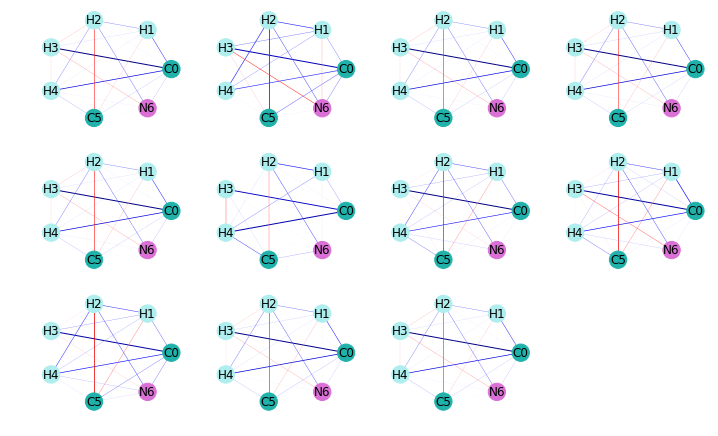

In [14]:
n = int(np.ceil(np.sqrt(estimator.hidden_layer_sizes)))

fig = plt.figure(figsize=(12, 10))
for i in range(n**2):
    if i >= estimator.hidden_layer_sizes[0]:
        break
    fig.add_subplot(n,n,1+i)
    A = np.matrix(matrix[i])
    graph2 = nx.from_numpy_matrix(A, parallel_edges=False)
    

    labels = {}
    labels[0] = 'C0'
    labels[1] = 'H1'
    labels[2] = 'H2'
    labels[3] = 'H3'
    labels[4] = 'H4'
    labels[5] = 'C5'
    labels[6] = 'N6'

    colors = ["lightseagreen", "paleturquoise", "paleturquoise", "paleturquoise", "paleturquoise", "lightseagreen", "orchid"]

    # edges widths
    edgewidth = [abs(d['weight']) for (u, v, d) in graph2.edges(data=True)]
    if len(edgewidth) > 0:
        if len(edgewidth)==1:
            norm_fact = edgewidth[0]
        else:
            norm_fact = max(edgewidth)
        edge_std_list = np.ones(len(edgewidth)) * norm_fact
        edgewidth = edgewidth/edge_std_list
        
    # Added so that the negative and positive features have different colours     
    edgecolours = [d['weight'] for (u, v, d) in graph2.edges(data=True)]

    plt.axis('off')
    nx.draw_circular(graph2,
                     width=edgewidth,
                     with_labels=True, 
                     labels=labels, 
                     node_color=colors,
                     edge_color=edgecolours, 
                     edge_cmap=plt.cm.seismic,
                     edge_vmin=-1,
                     edge_vmax=1
                     )

# plt.savefig("mod1tot_noweight.png", dpi=200)  # save as png

plt.show()  # display

In [9]:
data = joblib.load("cartesian_and_descriptor.bz")
X_cartesian = data["X_cartesian"]
X_descriptor = data["X_id"]

In [10]:
# Calculating the activations of all the nodes
activations = estimator.max_act(X_descriptor)
print(activations.shape)

(17864, 11)


In [11]:
# The maximum and minimum activation for each neuron
for i in range(11):
    print("The max and min activations for neuron " + str(i) + " are:")
    print(max(activations[:,i]), min(activations[:,i]))

The max and min activations for neuron 0 are:
1.0 7.88943e-10
The max and min activations for neuron 1 are:
1.0 2.25101e-12
The max and min activations for neuron 2 are:
1.0 2.27033e-16
The max and min activations for neuron 3 are:
1.0 2.99444e-35
The max and min activations for neuron 4 are:
1.0 0.0
The max and min activations for neuron 5 are:
1.0 2.24524e-06
The max and min activations for neuron 6 are:
1.0 3.53242e-18
The max and min activations for neuron 7 are:
1.0 7.93233e-27
The max and min activations for neuron 8 are:
1.0 5.17269e-18
The max and min activations for neuron 9 are:
1.0 8.81963e-14
The max and min activations for neuron 10 are:
1.0 1.58115e-18


In [12]:
# The index that gives the max and min activation for each neuron
for i in range(11):
    print("The max and min activations for neuron " + str(i) + " are:")
    print(np.argmax(activations[:,i]), np.argmin(activations[:,i]))

The max and min activations for neuron 0 are:
237 10321
The max and min activations for neuron 1 are:
12032 14125
The max and min activations for neuron 2 are:
1926 14125
The max and min activations for neuron 3 are:
892 14149
The max and min activations for neuron 4 are:
39 5936
The max and min activations for neuron 5 are:
9 15520
The max and min activations for neuron 6 are:
12987 13978
The max and min activations for neuron 7 are:
4052 13980
The max and min activations for neuron 8 are:
237 10515
The max and min activations for neuron 9 are:
49 14142
The max and min activations for neuron 10 are:
21 14149
